In [1]:
from fpl_auto import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
d = data.fpl_data('data', '2022-23')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Man City'),
  Text(2, 0, 'Liverpool'),
  Text(3, 0, 'Newcastle'),
  Text(4, 0, 'Aston Villa'),
  Text(5, 0, 'Spurs'),
  Text(6, 0, 'Fulham'),
  Text(7, 0, 'Chelsea'),
  Text(8, 0, 'Man Utd'),
  Text(9, 0, 'West Ham'),
  Text(10, 0, 'Brentford'),
  Text(11, 0, 'Bournemouth'),
  Text(12, 0, 'Brighton'),
  Text(13, 0, 'Wolves'),
  Text(14, 0, "Nott'm Forest"),
  Text(15, 0, 'Crystal Palace'),
  Text(16, 0, 'Everton'),
  Text(17, 0, 'Luton'),
  Text(18, 0, 'Burnley'),
  Text(19, 0, 'Sheffield Utd')])

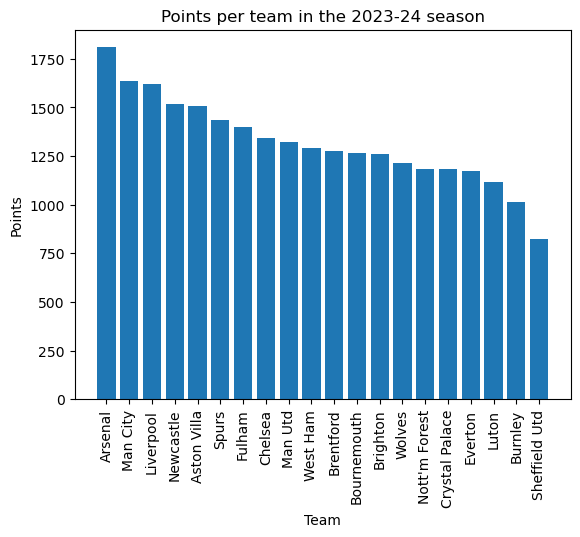

In [2]:
# What points did each team score?
season = '2023-24'
# Initalise a dictionary to store the points for each team
points = {}

for i in range(0,33):
    week_data = d.get_gw_data(season, i + 1)
    # drop everything but points and team
    week_data = week_data[['team', 'total_points']]
    # iterate through the pd dataframe and add the points to the dictionary per team
    for index, row in week_data.iterrows():
        team = row['team']
        points[team] = points.get(team, 0) + row['total_points']
    
# Order the dictionary by points
points = dict(sorted(points.items(), key=lambda item: item[1], reverse=True))

# Plot the points
fig, ax = plt.subplots()
ax.bar(points.keys(), points.values())
ax.set_ylabel('Points')
ax.set_xlabel('Team')
ax.set_title(f'Points per team in the {season} season')
plt.xticks(rotation=90)


In [3]:
# What is the average points per player?
seasons = ['2020-21', '2021-22', '2022-23']
# Initialize a dictionary to store the average points for each position
season_avg_points = {}
for season in seasons:
    points = {}
    players = {}
    for i in range(0, 38):
        week_data = d.get_gw_data(season, i + 1)
        # Drop everything but points and position
        week_data = week_data[['position', 'total_points', 'minutes']]
        # Exclude players who played less than 60 minutes
        week_data = week_data[week_data['minutes'] > 70]
        # Iterate through the pd dataframe and add the points and count the players per position
        for index, row in week_data.iterrows():
            position = row['position']
            if position == 'GKP':
                position = 'GK'
            points[position] = points.get(position, 0) + row['total_points']
            players[position] = players.get(position, 0) + 1
    # Calculate the average points per player for each position
    avg_points = {pos: points[pos] / players[pos] for pos in points}
    season_avg_points[season] = avg_points


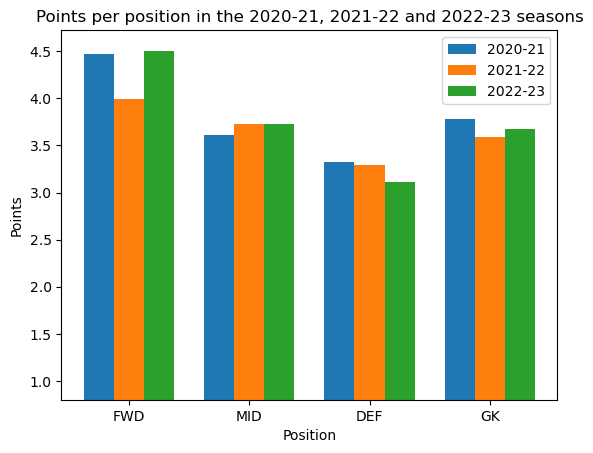

In [4]:
fig, ax = plt.subplots()
width = 0.25
positions = ['FWD', 'MID', 'DEF', 'GK']  # Order the positions
x = np.arange(len(positions))
for i, season in enumerate(season_avg_points.keys()):
    # Get the values for the ordered positions
    values = [season_avg_points[season][pos] for pos in positions]
    ax.bar(x + i * width, values, width, label=season)
ax.set_ylabel('Points')
ax.set_xlabel('Position')
ax.set_title('Points per position in the 2020-21, 2021-22 and 2022-23 seasons')
ax.set_xticks(x + width)
ax.set_xticklabels(positions)
ax.legend()
ax.set_ylim(bottom=0.8)  # Set the minimum y-axis value to 0.8
plt.show()

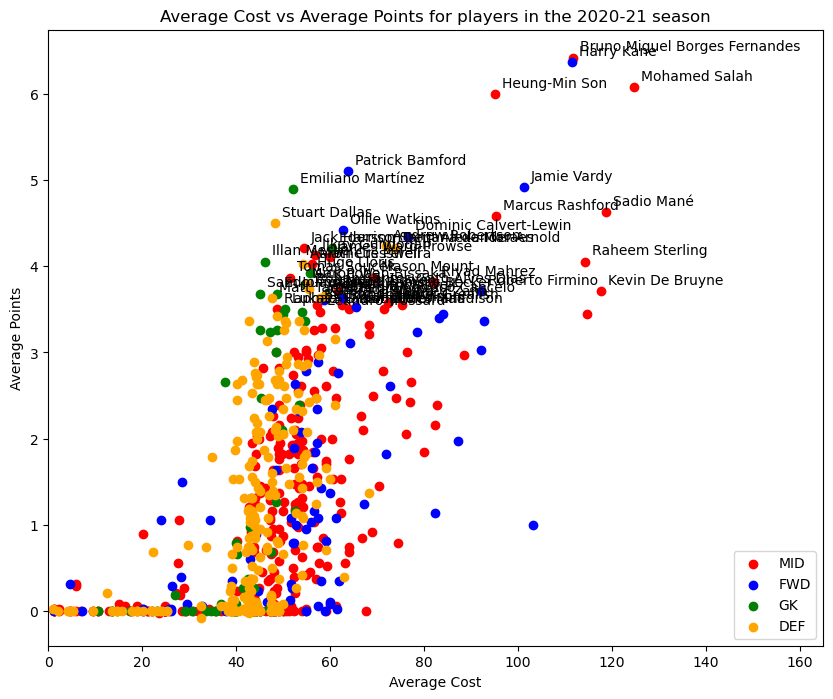

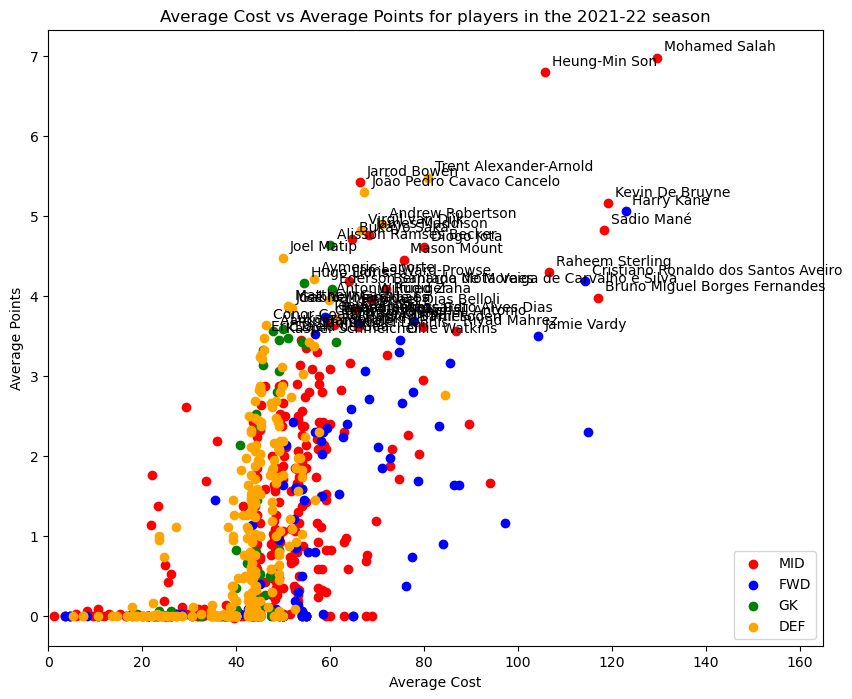

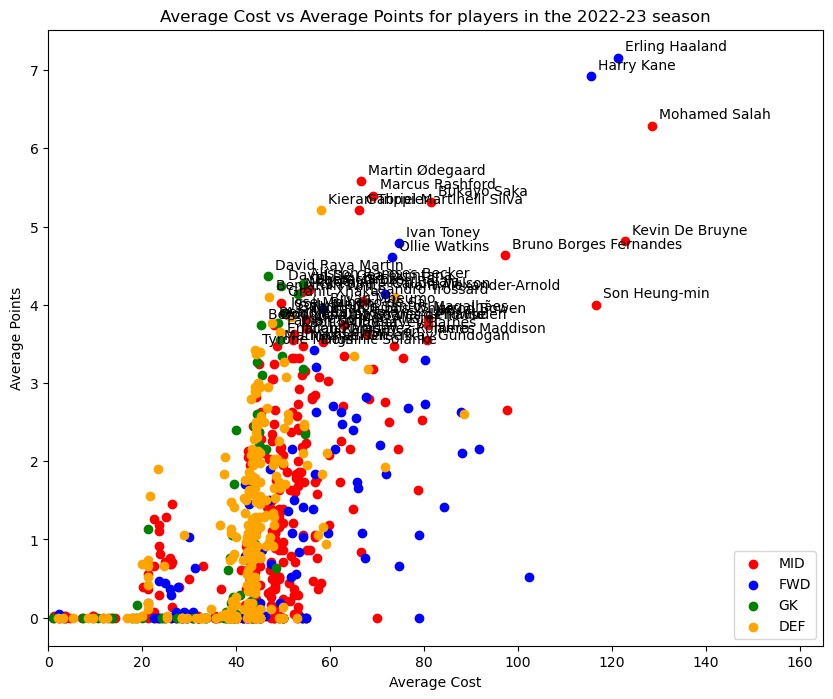

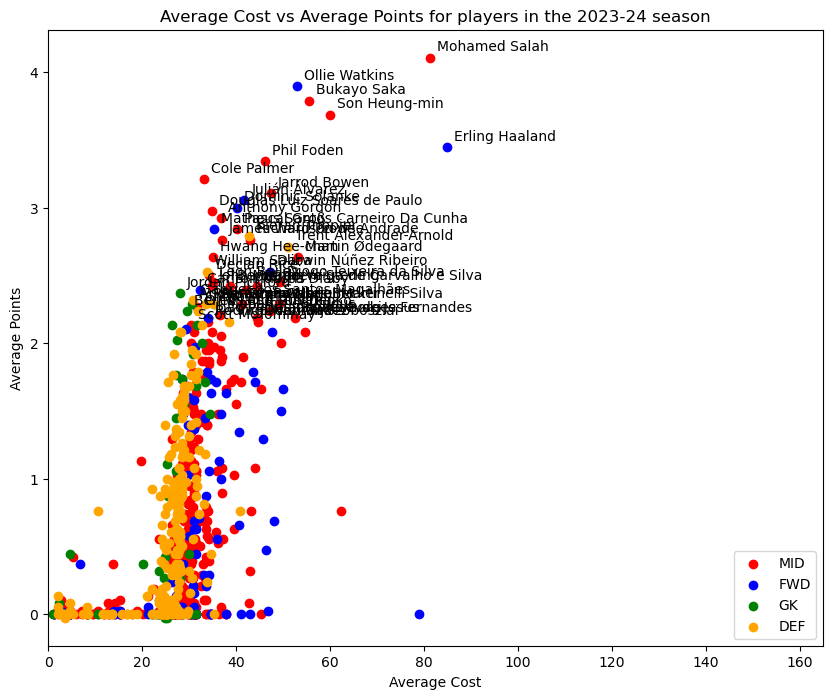

In [5]:
# What points did each player score?
seasons = ['2020-21', '2021-22', '2022-23', '2023-24']

def plot_p_vs_v(season):
    # Initialize variables to store the sum of points and values
    total_points = {}
    total_value = {}
    player_positions = {}
    upper_bound = 38
    if season == '2023-24':
        upper_bound = 24
    for i in range(0, upper_bound):
        week_data = d.get_gw_data(season, i+1)
        # Drop everything but points, cost, and position
        week_data = week_data[['total_points', 'value', 'position']]

        # combine index in the dataframe
        week_data = week_data.reset_index()
        # Iterate through the pd dataframe and add the points, cost, and position to the dictionaries per player
        for index, row in week_data.iterrows():
            player = row['name']
            points = row['total_points']
            cost = row['value']
            position = row['position']
            # Sum the points and values separately
            # if points = 0 or cost = 0, skip
            total_points[player] = total_points.get(player, 0) + points
            total_value[player] = total_value.get(player, 0) + cost
            player_positions[player] = position
        
    # Calculate the average cost and average points for each player
    average_cost = {player: total_value[player] / 38 for player in total_value}
    average_points = {player: total_points[player] / 38 for player in total_points}

    # Plot the average cost vs average points with player positions as colors
    fig, ax = plt.subplots(figsize=(10, 8))  # Increase the height to 8
    positions = set(player_positions.values())
    colors = ['red', 'blue', 'green', 'orange', 'purple']  # Removed yellow color
    for position in positions:
        x = [average_cost[player] for player in average_cost if player_positions[player] == position]
        y = [average_points[player] for player in average_points if player_positions[player] == position]
        ax.scatter(x, y, label=position, color=colors.pop(0))
        # Annotate top 10 points with player names
        top_10_players = sorted(total_points, key=total_points.get, reverse=True)[:50]
        for player in top_10_players:
            if player_positions[player] == position:
                ax.annotate(player, (average_cost[player], average_points[player]), xytext=(5, 5), textcoords='offset points')
    ax.set_ylabel('Average Points')
    ax.set_xlabel('Average Cost')
    ax.set_title(f'Average Cost vs Average Points for players in the {season} season')
    ax.legend(loc='lower right')
    ax.set_xlim(left=0, right=165)  # Set the minimum x-axis value to 0
    plt.show()

for season in seasons:
    plot_p_vs_v(season)

In [6]:
from fpl_auto import data 
import pandas as pd
import numpy as np
import json

# Load data
d = data.fpl_data('data', '2023-24')
fpl_api = d.api_to_json()
# find all players that have a chance_of_playing that is not 100
players = fpl_api['elements']
players = [player for player in players if player['chance_of_playing_next_round'] != 100 and player['chance_of_playing_next_round'] != None]
# create a dataframe from the players
df = pd.DataFrame(players)
# merge the first_name and second_name columns
df['name'] = df['first_name'] + ' ' + df['second_name']
df = df[['name', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'news']]
# print the dataframe
print(df)

# save the dataframe to a tsv file
df.to_csv(f'injury_list_gw{d.get_recent_gw()}.tsv', sep='\t', index=False)


                        name  chance_of_playing_next_round  \
0            Folarin Balogun                             0   
1    Marcus Oliveira Alencar                             0   
2               Nicolas Pépé                             0   
3       Rúnar Alex Rúnarsson                             0   
4             Kieran Tierney                             0   
..                       ...                           ...   
320   Daniel Castelo Podence                             0   
321            Matija Šarkić                             0   
322             Owen Hesketh                             0   
323          Yerson Mosquera                             0   
324             Leon Chiwome                             0   

     chance_of_playing_this_round  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   
..                            ...

In [7]:
from fpl_auto import team

t = team.team('2023-24', 1)
t.initial_team_generator()
print(f'xP {t.team_xp(include_subs=True)} including subs')
print(f'P {t.team_p()}')

Selecting fresh team...
2 players bought for GK
3 players bought for FWD
5 players bought for MID
5 players bought for DEF
Complete!

xP 65.32 including subs
P 41


In [8]:
from fpl_auto import data

d = data.fpl_data('data', '2023-24')

training_data = d.get_training_data('2023-24', 1)

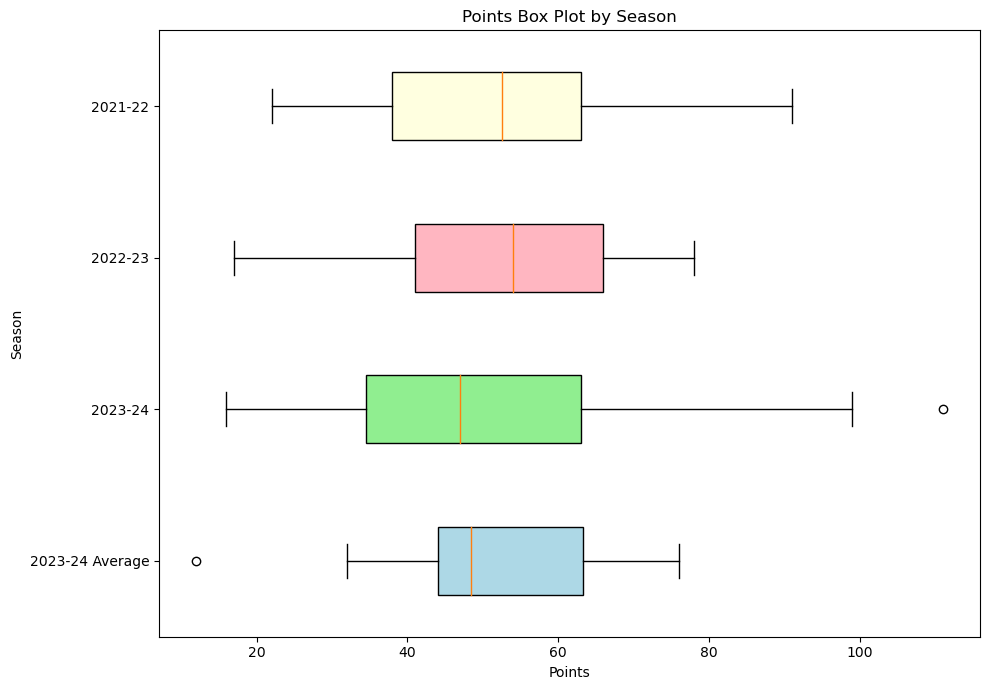

In [1]:
from fpl_auto import evaluate as eval

avg = [64, 44, 44, 72, 44, 68, 49, 44, 67, 66, 32, 64, 46, 54, 35, 40, 44, 36, 38, 59, 47, 48, 57, 62, 73, 46, 63, 44, 12, 47, 46, 56, 58, 76, 52, 65]
points_2022_23 = [78, 66, 70, 60, 64, 25, 48, 61, 41, 42, 77, 63, 53, 78, 78, 66, 70, 53, 48, 54, 54, 35, 58, 66, 44, 36, 41, 17, 26, 58, 76, 39, 61, 39, 30, 63, 28]

points_2021_22 = [70, 68, 63, 36, 52, 38, 58, 38, 54, 37, 53, 44, 73, 65, 63, 50, 60, 59, 34, 53, 67, 36, 71, 23, 56, 40, 33, 65, 39, 22, 40, 72, 45, 55, 91, 30, 46, 24]

points_2023_24 = [41, 58, 54, 32, 47, 47, 21, 111, 63, 69, 42, 48, 26, 33, 63, 78, 55, 34, 35, 54, 29, 18, 96, 35, 24, 53, 44, 99, 42, 16, 76, 66, 69, 37, 51]

seasons = ['2023-24 Average','2023-24', '2022-23', '2021-22']
points = [avg, points_2023_24, points_2022_23, points_2021_22]


eval.box_plot_by_season(points, seasons)

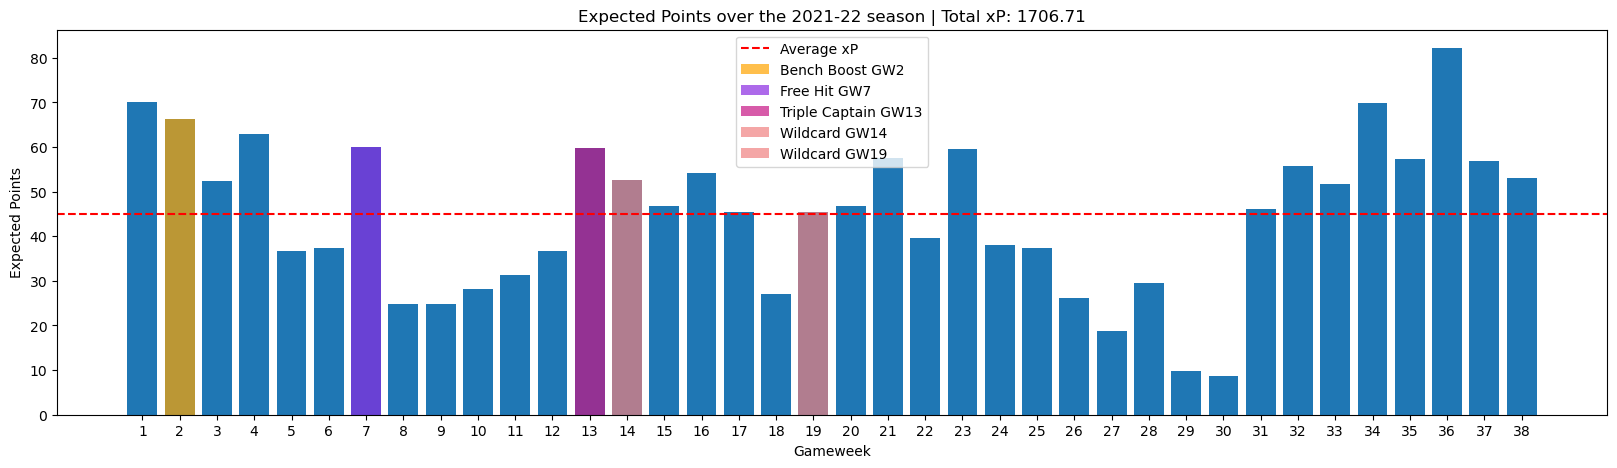

In [10]:
xp_list = [70.03, 66.17, 52.41, 62.81, 36.65, 37.27, 59.93, 24.79, 24.88, 28.17, 31.35, 36.63, 59.76, 52.68, 46.77, 54.1, 45.44, 26.95, 45.41, 46.79, 57.55, 39.5, 59.6, 37.93, 37.45, 26.14, 18.69, 29.62, 9.72, 8.74, 46.08, 55.66, 51.68, 69.92, 57.4, 82.18, 56.86, 53]
chips = [
    ["Bench Boost", 2],
    ["Free Hit", 7],
    ["Triple Captain", 13],
    ["Wildcard", 14],
    ["Wildcard", 19]
  ]
season = '2021-22'

eval.plotxp(season, xp_list, 1, len(xp_list) + 1, chips) 